In [37]:
import torch
import torch.nn as nn

class Discriminator2(nn.Module):
    def __init__(self, img_channels=3):
        self.img_channels = img_channels
        super(Discriminator2, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(img_channels, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.out = nn.Sequential(
            nn.Linear(128 * 12 * 12, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), self.img_channels, 48, 48)
        x = self.main(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

discriminator2 = Discriminator2()
output = discriminator2(torch.randn(64, 3*48*48))
output.shape

torch.Size([64, 1])

In [46]:
import torch.nn as nn

class Generator2(nn.Module):
    def __init__(self, z_dim=100, img_channels=3):
        super(Generator2, self).__init__()
        self.init_size = 48 // 4  # Tamaño inicial después de la capa lineal
        self.input_size = z_dim # ruido de entrada
        self.img_channels = img_channels # canales de la imagen de salida
        # Capa lineal que mapea el ruido de entrada a una imagen de 128 canales con tamaño 12x12
        self.l1 = nn.Sequential(nn.Linear(self.input_size, 128 * self.init_size ** 2))
        # Bloques de convolución
        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128), # Normalización por lotes
            nn.Upsample(scale_factor=2), # Upsampling de 12x12 a 24x24
            nn.Conv2d(128, 128, 3, stride=1, padding=1), # Convolución de 128 canales con kernel de 3x3, stride de 1 y padding de 1
            nn.BatchNorm2d(128), # Normalización por lotes
            nn.LeakyReLU(0.2, inplace=True), # LeakyReLU con pendiente de 0.2
            nn.Upsample(scale_factor=2), # Upsampling de 24x24 a 48x48
            nn.Conv2d(128, 64, 3, stride=1, padding=1), # Convolución de 64 canales con kernel de 3x3, stride de 1 y padding de 1
            nn.BatchNorm2d(64), # Normalización por lotes
            nn.LeakyReLU(0.2, inplace=True), # LeakyReLU con pendiente de 0.2
            nn.Conv2d(64, 32, 3, stride=1, padding=1), # Nueva capa convolucional con 32 canales, kernel de 3x3, stride de 1 y padding de 1
            nn.BatchNorm2d(32), # Normalización por lotes
            nn.LeakyReLU(0.2, inplace=True), # LeakyReLU con pendiente de 0.2
            nn.Conv2d(32, self.img_channels, 3, stride=1, padding=1), # Nueva capa convolucional con 3 canales, kernel de 3x3, stride de 1 y padding de 1
            nn.Tanh() # Tanh para obtener valores entre [-1, 1]
        )

    def forward(self, z):
        out = self.l1(z) # Aplicamos la capa lineal
        out = out.view(out.shape[0], 128, self.init_size, self.init_size) # Redimensionamos 
        img = self.conv_blocks(out) # Aplicamos los bloques de convolución para obtener la imagen
        img = img.view(img.size(0), self.img_channels*48*48) # Redimensionamos a un vector de 6912 elementos
        return img


noise = torch.randn(64, 100)
generator2 = Generator2(z_dim=100, img_channels=3)
output1 = generator2(noise)
output.shape

torch.Size([64, 1])

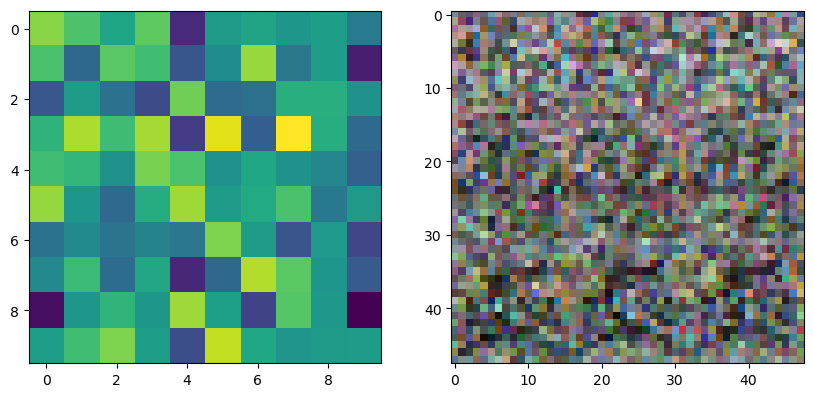

In [47]:
# graficar el noise generado y el output de la red
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(noise[0].reshape(10,10))
plt.subplot(1,2,2)
plt.imshow(output1[0].reshape(48,48,3).detach().numpy()*0.5+0.5)
plt.show()

In [40]:
class Generator1(nn.Module):
    def __init__(self, z_dim=100, img_channels=3):
        super(Generator1, self).__init__()
        self.input_size = z_dim
        self.img_channels = img_channels
        self.inp = nn.Sequential(
            nn.Linear(self.input_size, 256 * 6 * 6),  # Aumenta la dimensionalidad inicial
            nn.BatchNorm1d(256 * 6 * 6),
            nn.ReLU(True)
        )
        self.main = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, self.img_channels, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.inp(x)
        x = x.view(-1, 256, 6, 6)  # Ajusta el tamaño de la capa inicial
        x = self.main(x)
        return x

noise2 = torch.randn(64, 100)
generator1 = Generator1(z_dim=100, img_channels=3)
output2 = generator1(noise2)
output2.shape

torch.Size([64, 3, 48, 48])

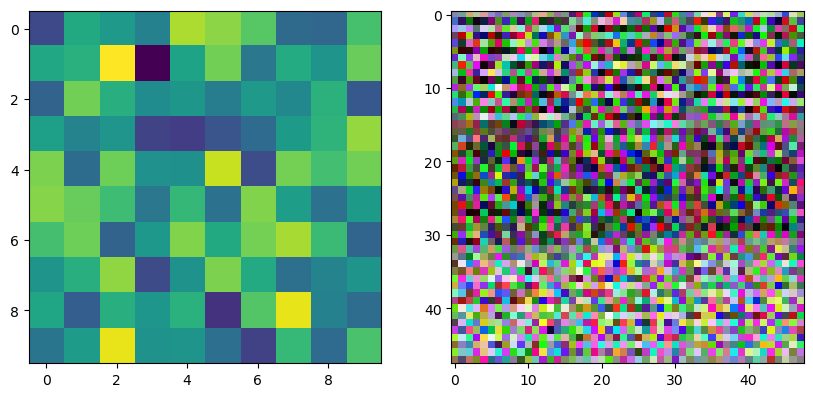

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(noise2[0].reshape(10,10))
plt.subplot(1,2,2)
plt.imshow(output2[0].reshape(48,48,3).detach().numpy()*0.5+0.5)
plt.show()